In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# Load agencies dataset
df_agencias = pd.read_csv('../banvic/seeds/banvic/agencias.csv')
print(f"✅ Loaded {len(df_agencias):,} agency records")


✅ Loaded 10 agency records


# Análise Descritiva - Agências

In [4]:
print("🏢 AGÊNCIAS ANALYSIS")
print("=" * 50)

# Basic info
print("📋 Basic Information:")
print(f"   - Total agencies: {len(df_agencias)}")
print(f"   - Columns: {list(df_agencias.columns)}")
print(f"   - Missing values: {df_agencias.isnull().sum().sum()}")

# Convert date column
df_agencias['data_abertura'] = pd.to_datetime(df_agencias['data_abertura'], format='mixed')

# Agency types distribution
print(f"\n🏛️ Agency Types:")
print(df_agencias['tipo_agencia'].value_counts())

# States distribution
print(f"\n🗺️ Geographic Distribution:")
print("States:")
print(df_agencias['uf'].value_counts())
print("\nCities:")
print(df_agencias['cidade'].value_counts())

# Opening dates analysis
print(f"\n📅 Opening Dates Analysis:")
print(f"   - Oldest agency: {df_agencias['data_abertura'].min()}")
print(f"   - Newest agency: {df_agencias['data_abertura'].max()}")
print(f"   - Agencies opened by year:")
print(df_agencias['data_abertura'].dt.year.value_counts().sort_index())


🏢 AGÊNCIAS ANALYSIS
📋 Basic Information:
   - Total agencies: 10
   - Columns: ['cod_agencia', 'nome', 'endereco', 'cidade', 'uf', 'data_abertura', 'tipo_agencia']
   - Missing values: 0

🏛️ Agency Types:
tipo_agencia
Física     9
Digital    1
Name: count, dtype: int64

🗺️ Geographic Distribution:
States:
uf
SP    6
RS    1
RJ    1
SC    1
PE    1
Name: count, dtype: int64

Cities:
cidade
São Paulo         4
Campinas          1
Osasco            1
Porto Alegre      1
Rio de Janeiro    1
Florianópolis     1
Recife            1
Name: count, dtype: int64

📅 Opening Dates Analysis:
   - Oldest agency: 2010-01-01 00:00:00
   - Newest agency: 2021-10-09 00:00:00
   - Agencies opened by year:
data_abertura
2010    2
2012    1
2013    2
2015    2
2018    1
2019    1
2021    1
Name: count, dtype: int64


# Visualizações

## Tipo de Agência

(array([0, 1]), [Text(0, 0, 'Física'), Text(1, 0, 'Digital')])

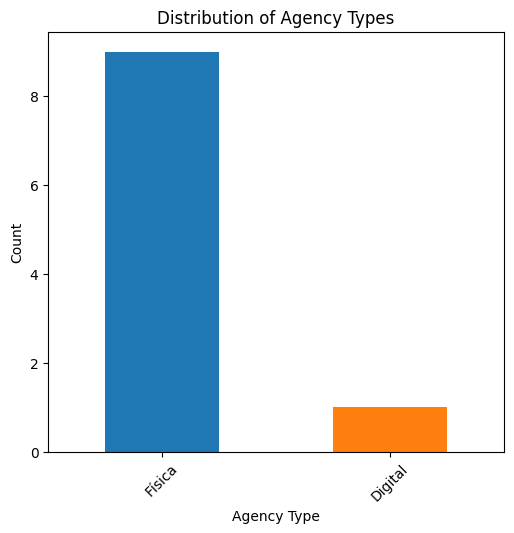

In [5]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
df_agencias['tipo_agencia'].value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Distribution of Agency Types')
plt.xlabel('Agency Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

## Distribuição de agências por estado

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'SP'),
  Text(1, 0, 'RS'),
  Text(2, 0, 'RJ'),
  Text(3, 0, 'SC'),
  Text(4, 0, 'PE')])

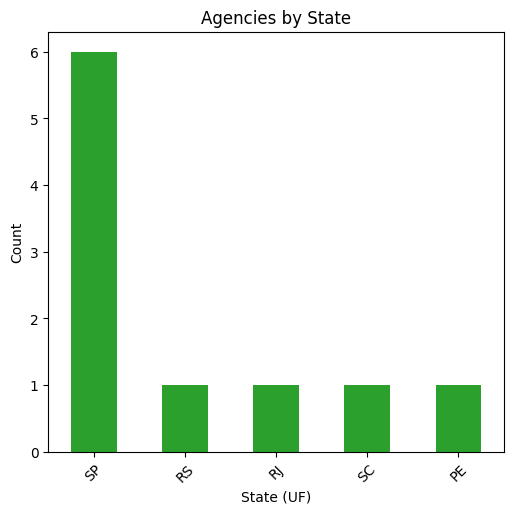

In [6]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 2)
df_agencias['uf'].value_counts().plot(kind='bar', color='#2ca02c')
plt.title('Agencies by State')
plt.xlabel('State (UF)')
plt.ylabel('Count')
plt.xticks(rotation=45)

## Abertura de agências por tempo

Text(0, 0.5, 'Number of Agencies')

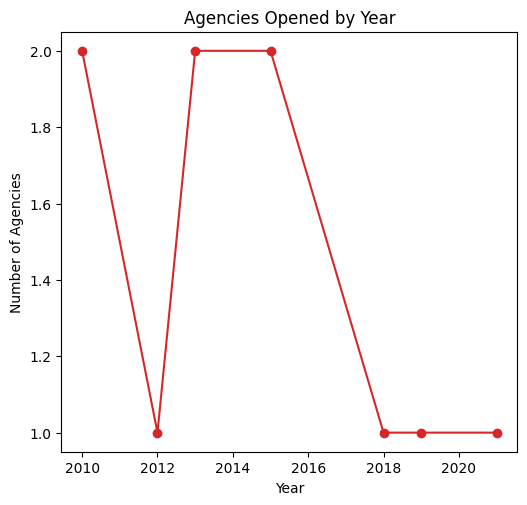

In [7]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 3)
df_agencias['data_abertura'].dt.year.value_counts().sort_index().plot(kind='line', marker='o', color='#d62728')
plt.title('Agencies Opened by Year')
plt.xlabel('Year')
plt.ylabel('Number of Agencies')

## Distribuição de agências por cidades

Text(0.5, 0, 'Number of Agencies')

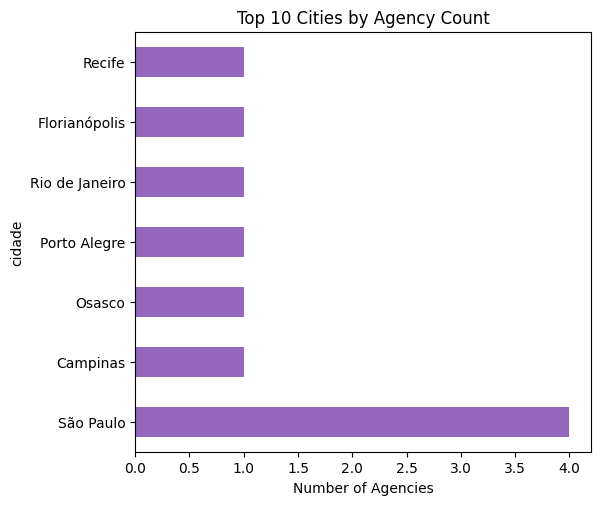

In [8]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 4)
df_agencias['cidade'].value_counts().head(10).plot(kind='barh', color='#9467bd')
plt.title('Top 10 Cities by Agency Count')
plt.xlabel('Number of Agencies')

## Tipo de agência por estado

<Figure size 2000x1200 with 0 Axes>

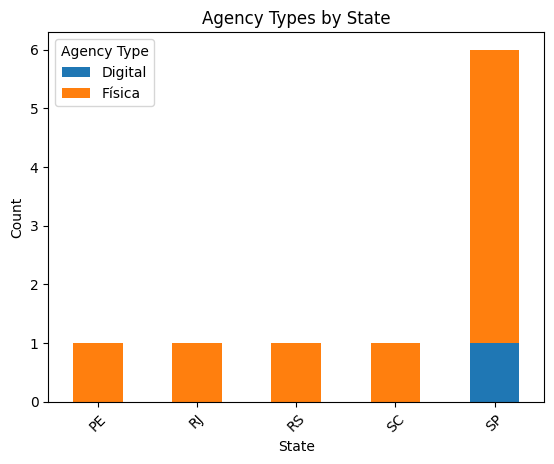

In [11]:
plt.figure(figsize=(20, 12))
agency_state = pd.crosstab(df_agencias['uf'], df_agencias['tipo_agencia'])
agency_state.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Agency Types by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Agency Type')

## Abertura de agências por tempo

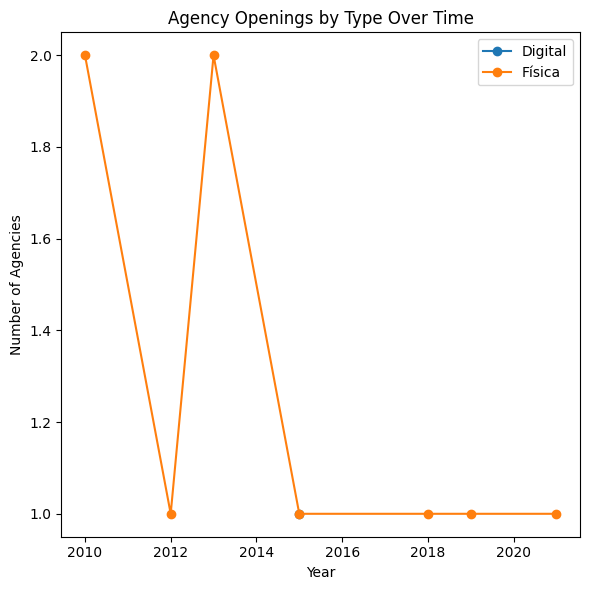

In [14]:
plt.figure(figsize=(6, 6))
for tipo in df_agencias['tipo_agencia'].unique():
    subset = df_agencias[df_agencias['tipo_agencia'] == tipo]
    subset['data_abertura'].dt.year.value_counts().sort_index().plot(kind='line', marker='o', label=tipo)
plt.title('Agency Openings by Type Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Agencies')
plt.legend()

plt.tight_layout()
plt.show()


## Resumo

In [5]:
# Summary statistics
print(f"\n📊 Summary Statistics:")
print(f"   - Average agencies per state: {len(df_agencias) / df_agencias['uf'].nunique():.1f}")
print(f"   - Most common state: {df_agencias['uf'].value_counts().index[0]} ({df_agencias['uf'].value_counts().iloc[0]} agencies)")
print(f"   - Most common city: {df_agencias['cidade'].value_counts().index[0]} ({df_agencias['cidade'].value_counts().iloc[0]} agencies)")
print(f"   - Geographic coverage: {df_agencias['uf'].nunique()} states")
print(f"   - Agency type distribution: {df_agencias['tipo_agencia'].value_counts().to_dict()}")



📊 Summary Statistics:
   - Average agencies per state: 2.0
   - Most common state: SP (6 agencies)
   - Most common city: São Paulo (4 agencies)
   - Geographic coverage: 5 states
   - Agency type distribution: {'Física': 9, 'Digital': 1}
